# TFM-Preprocesamiento de los datos
Alumna: Jone Aguinaga Bengoetxea

Tutora: Yudith Coromoto Cardinale Villarreal

Máster Universitario en Big Data y Ciencia de Datos, VIU

#0.Importación de librerías

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sb

# 1.Inicialización

In [ ]:
#Google drive
from google.colab import drive
drive.mount('/content/drive')

#Directorio del dataset
DSet = '/content/drive/MyDrive/TFM/Dataset/'
os.chdir(DSet)

print("\nCarpeta actual:\n", os.getcwd())
print("\nArchivos en la carpeta:\n", os.listdir())

Mounted at /content/drive

Carpeta actual:
 /content/drive/MyDrive/TFM/Dataset

Archivos en la carpeta:
 ['label_data_new', 'sensor_data_new', 'midata']


# 2.Procesamiento y etiquetado de datos

Tenemos 32 personas:

-26 train

-3 eval

-3 test

In [ ]:
subjects_train = np.arange(6,32)
subjects_val = np.array([32, 33, 35])
subjects_test = np.array([36, 37, 38])
tasks_fall = np.arange(20, 35)
tasks_adl = np.concatenate([np.arange(1, 20), np.array([35, 36])])
trials = np.arange(1,6)

Train

In [ ]:
window_size = 50
step_size = 10

xtrain = []
ytrain = []
id_train=[]

for i in subjects_train:
    time1 = time.time()
    print('Reading subject ', i, end=' , ')
    for j in tasks_fall:
        for k in trials:
            try:
                filename = f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}.csv'
                labelfilename = f'SA{str(i).zfill(2)}_label.xlsx'

                label = pd.read_excel(f'/content/drive/MyDrive/TFM/Dataset/label_data_new/{labelfilename}', index_col=None, header=None)[1:]
                data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(i).zfill(2)}/{filename}')

                acc = data[['AccX', 'AccY', 'AccZ']].values
                gyro = data[['GyrX', 'GyrY', 'GyrZ']].values
                euler = data[['EulerX', 'EulerY', 'EulerZ']].values

                data_len = len(data)
                fall_intervals = []

                for row in range(len(label)):
                  if not pd.isnull(label.iloc[row][0]):
                    activity_code = int(label.iloc[row][0][5:7])
                  if int(label.iloc[row][2]) == k and activity_code==j:
                    start = int(label.iloc[row][3]) - 1
                    end = int(label.iloc[row][4]) - 1
                    fall_intervals.append((start, end))

                print(f'Fall intervals for {filename}: {fall_intervals}')
                for start_idx in range(0, data_len - window_size + 1, step_size):
                    end_idx = start_idx + window_size

                    acc_win = acc[start_idx:end_idx]
                    gyro_win = gyro[start_idx:end_idx]
                    euler_win = euler[start_idx:end_idx]

                    fall_overlap = 0
                    for (fall_start, fall_end) in fall_intervals:
                        overlap_start = max(start_idx, fall_start)
                        overlap_end = min(end_idx, fall_end)
                        if overlap_start < overlap_end:
                            fall_overlap += (overlap_end - overlap_start)
                        if start_idx>fall_start:
                          fall_overlap=window_size

                    if fall_overlap >= 0.4 * window_size:
                        label_val = 1
                    else:
                        continue

                    xtrain.append({'Acc': acc_win,'Gyro': gyro_win,'Euler': euler_win})
                    ytrain.append({'Label': label_val})
                    id_train.append({'ID': f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}'})

            except:
                continue
    print('Time taken = ', time.time() - time1)

Reading subject  6 , Fall intervals for S06T20R01.csv: [(129, 207)]
Fall intervals for S06T20R02.csv: [(183, 271)]
Fall intervals for S06T20R03.csv: [(183, 259)]
Fall intervals for S06T20R04.csv: [(150, 230)]
Fall intervals for S06T20R05.csv: [(127, 222)]
Fall intervals for S06T21R01.csv: [(121, 160)]
Fall intervals for S06T21R02.csv: [(127, 166)]
Fall intervals for S06T21R03.csv: [(146, 186)]
Fall intervals for S06T21R04.csv: [(129, 166)]
Fall intervals for S06T22R01.csv: [(127, 193)]
Fall intervals for S06T22R02.csv: [(174, 239)]
Fall intervals for S06T22R03.csv: [(141, 215)]
Fall intervals for S06T22R04.csv: [(142, 207)]
Fall intervals for S06T22R05.csv: [(275, 344)]
Fall intervals for S06T23R01.csv: [(136, 222)]
Fall intervals for S06T23R02.csv: [(172, 252)]
Fall intervals for S06T23R03.csv: [(270, 360)]
Fall intervals for S06T23R04.csv: [(205, 287)]
Fall intervals for S06T23R05.csv: [(233, 315)]
Fall intervals for S06T24R01.csv: [(222, 293)]
Fall intervals for S06T24R02.csv: [(192

In [ ]:
# ADL tasks
for i in subjects_train:
    time1 = time.time()
    print('Reading subject ', i, end=' , ')
    for j in tasks_adl:
        for k in trials:
            try:
                filename = f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}.csv'
                data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(i).zfill(2)}/{filename}')

                acc = data[['AccX', 'AccY', 'AccZ']].values
                gyro = data[['GyrX', 'GyrY', 'GyrZ']].values
                euler = data[['EulerX', 'EulerY', 'EulerZ']].values

                data_len = len(data)
                for start_idx in range(0, data_len - window_size + 1, step_size):
                    end_idx = start_idx + window_size

                    acc_win = acc[start_idx:end_idx]
                    gyro_win = gyro[start_idx:end_idx]
                    euler_win = euler[start_idx:end_idx]

                    xtrain.append({'Acc': acc_win,'Gyro': gyro_win,'Euler': euler_win})
                    ytrain.append({'Label':0})
                    id_train.append({'ID': f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}'})

            except:
                continue
    print('Time taken = ', time.time() - time1)

In [ ]:
x_train = pd.DataFrame(xtrain)
y_train=pd.DataFrame(ytrain)
id_train=pd.DataFrame(id_train)

In [ ]:
y_train.shape

Balanceado?No

In [ ]:
print(y_train['Label'].value_counts())

In [ ]:
print(y_train['Label'].value_counts(normalize=True))

Validación

In [ ]:
xval = []
yval = []
idval=[]

for i in subjects_val:
    time1 = time.time()
    print('Reading subject ', i, end=' , ')
    for j in tasks_fall:
        for k in trials:
            try:
                filename = f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}.csv'
                labelfilename = f'SA{str(i).zfill(2)}_label.xlsx'

                label = pd.read_excel(f'/content/drive/MyDrive/TFM/Dataset/label_data_new/{labelfilename}', index_col=None, header=None)[1:]
                data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(i).zfill(2)}/{filename}')

                acc = data[['AccX', 'AccY', 'AccZ']].values
                gyro = data[['GyrX', 'GyrY', 'GyrZ']].values
                euler = data[['EulerX', 'EulerY', 'EulerZ']].values

                data_len = len(data)
                fall_intervals = []

                for row in range(len(label)):
                  if not pd.isnull(label.iloc[row][0]):
                    activity_code = int(label.iloc[row][0][5:7])
                  if int(label.iloc[row][2]) == k and activity_code==j:
                    start = int(label.iloc[row][3]) - 1
                    end = int(label.iloc[row][4]) - 1
                    fall_intervals.append((start, end))

                print(f'Fall intervals for {filename}: {fall_intervals}')
                cont=0
                for start_idx in range(0, data_len - window_size + 1, step_size):
                    end_idx = start_idx + window_size

                    acc_win = acc[start_idx:end_idx]
                    gyro_win = gyro[start_idx:end_idx]
                    euler_win = euler[start_idx:end_idx]

                    fall_overlap = 0
                    for (fall_start, fall_end) in fall_intervals:
                        overlap_start = max(start_idx, fall_start)
                        overlap_end = min(end_idx, fall_end)
                        if overlap_start < overlap_end:
                            fall_overlap += (overlap_end - overlap_start)
                        if start_idx>fall_start:
                          fall_overlap=window_size

                    if fall_overlap >= 0.4 * window_size:
                        label_val = 1
                    else:
                        label_val = 0

                    xval.append({'Acc': acc_win,'Gyro': gyro_win,'Euler': euler_win})
                    yval.append({'Label': label_val})
                    idval.append({'ID': f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}'})

            except:
                continue
    print('Time taken = ', time.time() - time1)

In [ ]:
# ADL tasks
for i in subjects_val:
    time1 = time.time()
    print('Reading subject ', i, end=' , ')
    for j in tasks_adl:
        for k in trials:
            try:
                filename = f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}.csv'
                data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(i).zfill(2)}/{filename}')

                acc = data[['AccX', 'AccY', 'AccZ']].values
                gyro = data[['GyrX', 'GyrY', 'GyrZ']].values
                euler = data[['EulerX', 'EulerY', 'EulerZ']].values

                data_len = len(data)
                for start_idx in range(0, data_len - window_size + 1, step_size):
                    end_idx = start_idx + window_size

                    acc_win = acc[start_idx:end_idx]
                    gyro_win = gyro[start_idx:end_idx]
                    euler_win = euler[start_idx:end_idx]

                    xval.append({'Acc': acc_win,'Gyro': gyro_win,'Euler': euler_win})
                    yval.append({'Label':0})
                    idval.append({'ID': f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}'})

            except:
                continue
    print('Time taken = ', time.time() - time1)

In [ ]:
x_val = pd.DataFrame(xval)
y_val=pd.DataFrame(yval)
id_val=pd.DataFrame(idval)

Test

In [ ]:
xtest = []
ytest = []
idtest=[]

for i in subjects_test:
    time1 = time.time()
    print('Reading subject ', i, end=' , ')
    for j in tasks_fall:
        for k in trials:
            try:
                filename = f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}.csv'
                labelfilename = f'SA{str(i).zfill(2)}_label.xlsx'

                label = pd.read_excel(f'/content/drive/MyDrive/TFM/Dataset/label_data_new/{labelfilename}', index_col=None, header=None)[1:]
                data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(i).zfill(2)}/{filename}')

                acc = data[['AccX', 'AccY', 'AccZ']].values
                gyro = data[['GyrX', 'GyrY', 'GyrZ']].values
                euler = data[['EulerX', 'EulerY', 'EulerZ']].values

                data_len = len(data)
                fall_intervals = []

                for row in range(len(label)):
                  if not pd.isnull(label.iloc[row][0]):
                    activity_code = int(label.iloc[row][0][5:7])
                  if int(label.iloc[row][2]) == k and activity_code==j:
                    start = int(label.iloc[row][3]) - 1
                    end = int(label.iloc[row][4]) - 1
                    fall_intervals.append((start, end))

                print(f'Fall intervals for {filename}: {fall_intervals}')
                cont=0
                for start_idx in range(0, data_len - window_size + 1, step_size):
                    end_idx = start_idx + window_size

                    acc_win = acc[start_idx:end_idx]
                    gyro_win = gyro[start_idx:end_idx]
                    euler_win = euler[start_idx:end_idx]

                    fall_overlap = 0
                    for (fall_start, fall_end) in fall_intervals:
                        overlap_start = max(start_idx, fall_start)
                        overlap_end = min(end_idx, fall_end)
                        if overlap_start < overlap_end:
                            fall_overlap += (overlap_end - overlap_start)
                        if start_idx>fall_start:
                          fall_overlap=window_size

                    if fall_overlap >= 0.4 * window_size:
                        label_val = 1
                    else:
                        label_val = 0

                    xtest.append({'Acc': acc_win,'Gyro': gyro_win,'Euler': euler_win})
                    ytest.append({'Label': label_val})
                    idtest.append({'ID': f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}'})

            except:
                continue
    print('Time taken = ', time.time() - time1)

In [ ]:
# ADL tasks
for i in subjects_test:
    time1 = time.time()
    print('Reading subject ', i, end=' , ')
    for j in tasks_adl:
        for k in trials:
            try:
                filename = f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}.csv'
                data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(i).zfill(2)}/{filename}')

                acc = data[['AccX', 'AccY', 'AccZ']].values
                gyro = data[['GyrX', 'GyrY', 'GyrZ']].values
                euler = data[['EulerX', 'EulerY', 'EulerZ']].values

                data_len = len(data)
                for start_idx in range(0, data_len - window_size + 1, step_size):
                    end_idx = start_idx + window_size

                    acc_win = acc[start_idx:end_idx]
                    gyro_win = gyro[start_idx:end_idx]
                    euler_win = euler[start_idx:end_idx]

                    xtest.append({'Acc': acc_win,'Gyro': gyro_win,'Euler': euler_win})
                    ytest.append({'Label':0})
                    idtest.append({'ID': f'S{str(i).zfill(2)}T{str(j).zfill(2)}R{str(k).zfill(2)}'})

            except:
                continue
    print('Time taken = ', time.time() - time1)

In [ ]:
x_test = pd.DataFrame(xtest)
y_test=pd.DataFrame(ytest)
id_test=pd.DataFrame(idtest)

#3.Visualizar una caída y un ADL.

Visualizar caída S06T20R01: Caída hacia adelante al intentar sentarse

In [ ]:
primera_caida = pd.read_csv('/content/S06T20R01.csv')

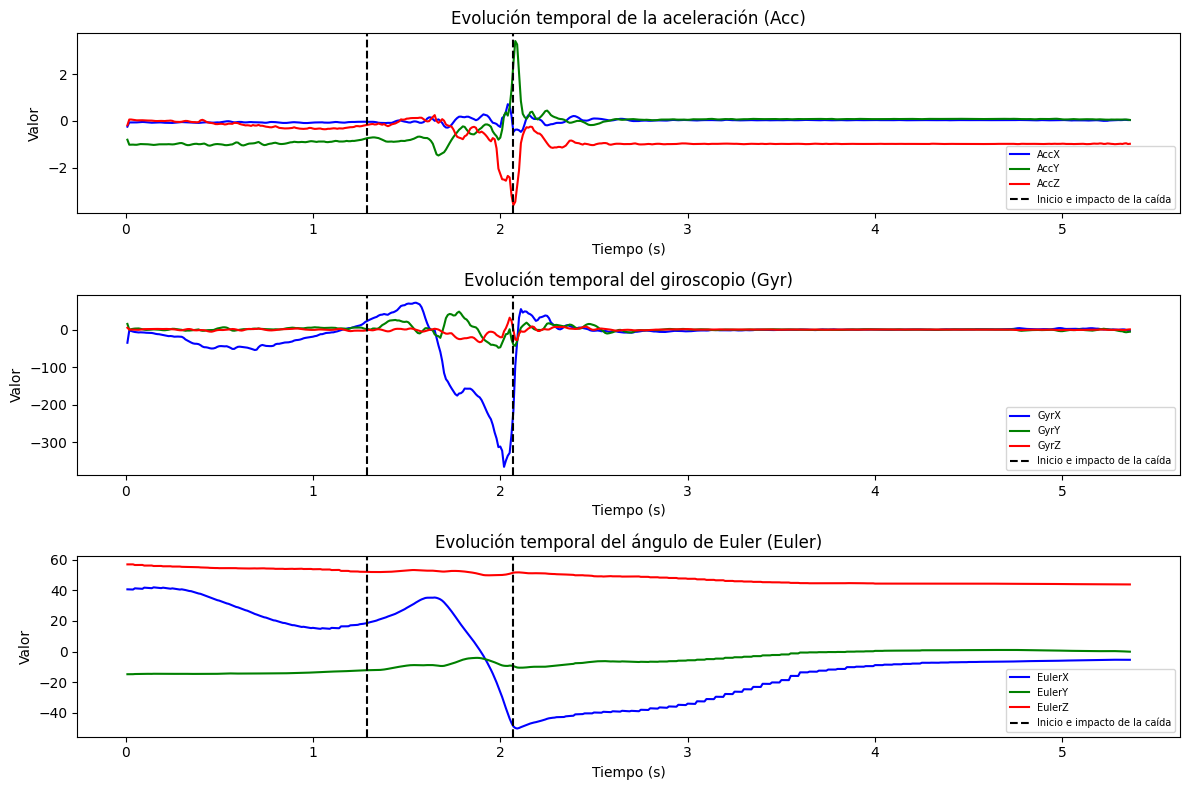

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].plot(primera_caida['TimeStamp(s)'],primera_caida['AccX'], label='AccX', color='blue')
axs[0].plot(primera_caida['TimeStamp(s)'],primera_caida['AccY'], label='AccY', color='green')
axs[0].plot(primera_caida['TimeStamp(s)'],primera_caida['AccZ'], label='AccZ', color='red')

axs[0].axvline(x=1.29, color='black', linestyle='--', label='Inicio e impacto de la caída')
axs[0].axvline(x=2.07, color='black', linestyle='--')

axs[0].set_title('Evolución temporal de la aceleración (Acc)')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Valor')

axs[0].legend(fontsize=7, loc='lower right')

axs[1].plot(primera_caida['TimeStamp(s)'],primera_caida['GyrX'], label='GyrX', color='blue')
axs[1].plot(primera_caida['TimeStamp(s)'],primera_caida['GyrY'], label='GyrY', color='green')
axs[1].plot(primera_caida['TimeStamp(s)'],primera_caida['GyrZ'], label='GyrZ', color='red')

axs[1].axvline(x=1.29, color='black', linestyle='--', label='Inicio e impacto de la caída')
axs[1].axvline(x=2.07, color='black', linestyle='--')

axs[1].set_title('Evolución temporal del giroscopio (Gyr)')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Valor')

axs[1].legend(fontsize=7, loc='lower right')

axs[2].plot(primera_caida['TimeStamp(s)'],primera_caida['EulerX'], label='EulerX', color='blue')
axs[2].plot(primera_caida['TimeStamp(s)'],primera_caida['EulerY'], label='EulerY', color='green')
axs[2].plot(primera_caida['TimeStamp(s)'],primera_caida['EulerZ'], label='EulerZ', color='red')

axs[2].axvline(x=1.29, color='black', linestyle='--', label='Inicio e impacto de la caída')
axs[2].axvline(x=2.07, color='black', linestyle='--')

axs[2].set_title('Evolución temporal del ángulo de Euler (Euler)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Valor')

axs[2].legend(fontsize=7, loc='lower right')

plt.tight_layout()
plt.show()

Visualizar una no caída S06T01R01: Permanecer de pie durante 30 segundos

In [ ]:
no_caida = pd.read_csv('/content/S06T01R01.csv')

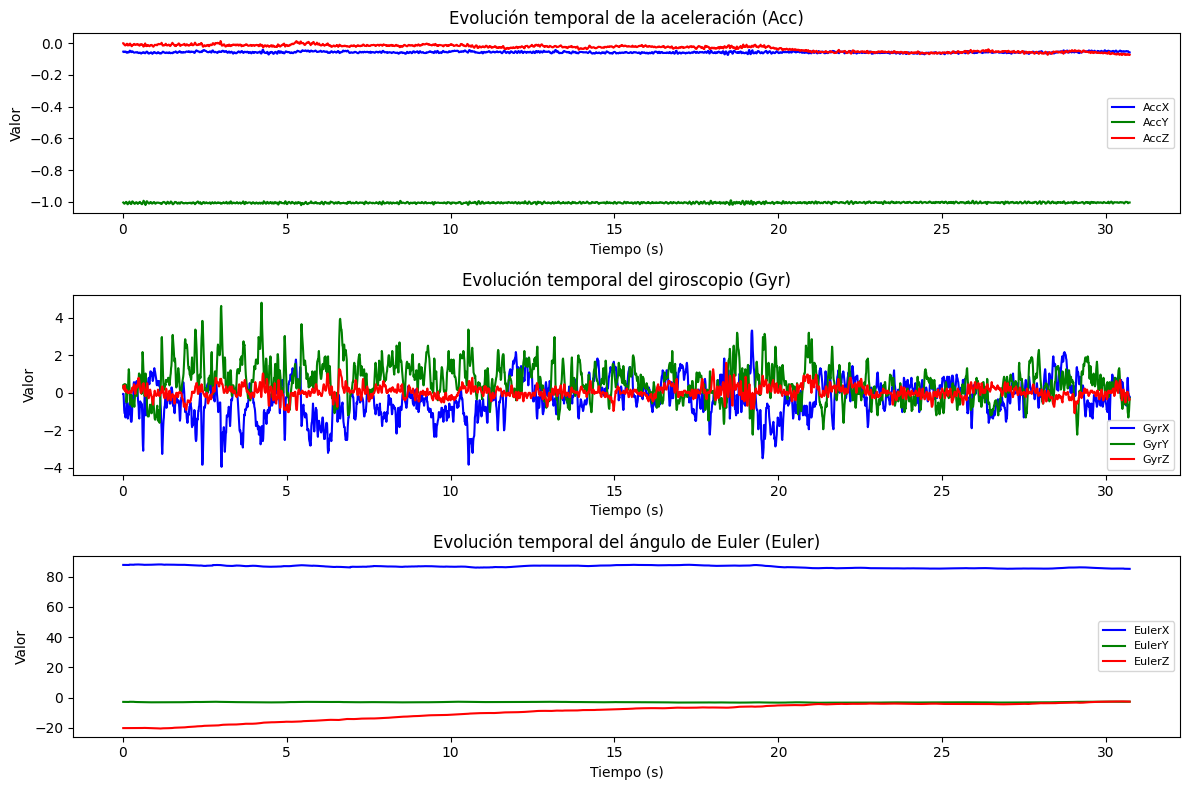

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].plot(no_caida['TimeStamp(s)'],no_caida['AccX'], label='AccX', color='blue')
axs[0].plot(no_caida['TimeStamp(s)'],no_caida['AccY'], label='AccY', color='green')
axs[0].plot(no_caida['TimeStamp(s)'],no_caida['AccZ'], label='AccZ', color='red')

axs[0].set_title('Evolución temporal de la aceleración (Acc)')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Valor')

axs[0].legend(fontsize=8, loc='center right')

axs[1].plot(no_caida['TimeStamp(s)'],no_caida['GyrX'], label='GyrX', color='blue')
axs[1].plot(no_caida['TimeStamp(s)'],no_caida['GyrY'], label='GyrY', color='green')
axs[1].plot(no_caida['TimeStamp(s)'],no_caida['GyrZ'], label='GyrZ', color='red')


axs[1].set_title('Evolución temporal del giroscopio (Gyr)')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Valor')

axs[1].legend(fontsize=8, loc='lower right')

axs[2].plot(no_caida['TimeStamp(s)'],no_caida['EulerX'], label='EulerX', color='blue')
axs[2].plot(no_caida['TimeStamp(s)'],no_caida['EulerY'], label='EulerY', color='green')
axs[2].plot(no_caida['TimeStamp(s)'],no_caida['EulerZ'], label='EulerZ', color='red')

axs[2].set_title('Evolución temporal del ángulo de Euler (Euler)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Valor')

axs[2].legend(fontsize=8, loc='center right')

plt.tight_layout()
plt.show()

#4.Visualizar algunos datos

In [ ]:
data_v=[]
for j in tasks_fall:
  try:
      filename = f'S{str(7).zfill(2)}T{str(j).zfill(2)}R{str(1).zfill(2)}.csv'
      data = pd.read_csv(f'/content/drive/MyDrive/TFM/Dataset/sensor_data_new/SA{str(7).zfill(2)}/{filename}')
      selected_columns = data[['AccX','AccY','AccZ','GyrX','GyrY','GyrZ','EulerX','EulerY','EulerZ']]
      data_v.append(selected_columns)
  except:
      continue

In [ ]:
df_all = pd.concat(data_v, ignore_index=True)

In [ ]:
df_all

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
0,0.040,-0.993,0.024,-4.640960,-23.262095,-0.343775,88.155318,10.616912,-179.811409
1,-0.007,-1.013,-0.008,-7.219271,1.661578,-0.114592,88.086563,10.622641,-179.799950
2,-0.013,-1.018,-0.008,-7.276567,1.661578,-0.343775,88.012078,10.622641,-179.782761
3,-0.016,-1.018,-0.008,-7.734933,1.489691,-0.515662,87.937594,10.628371,-179.765573
4,-0.015,-1.019,-0.008,-8.136004,1.203212,-0.687550,87.857380,10.393458,-179.874435
...,...,...,...,...,...,...,...,...,...
7621,-0.142,0.008,1.009,-0.229183,-0.343775,0.057296,-179.427527,-7.860984,-81.486087
7622,-0.142,0.007,1.009,-0.171887,-0.286479,0.000000,-179.427527,-7.855254,-81.486087
7623,-0.142,0.008,1.008,-0.057296,-0.171887,0.000000,-179.427527,-7.855254,-81.486087
7624,-0.143,0.007,1.007,0.000000,-0.057296,0.114592,-179.542119,-7.895361,-81.474628


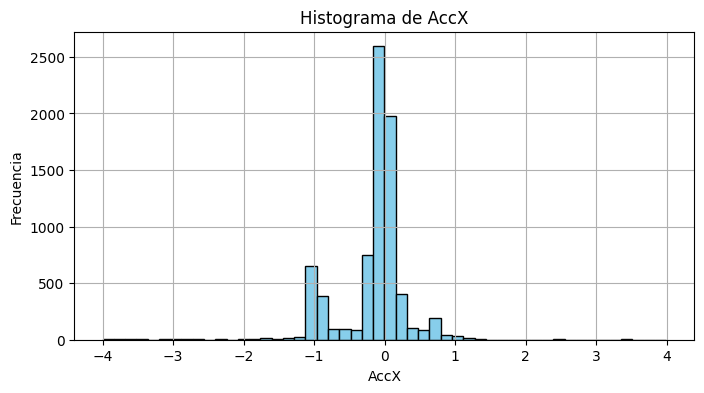

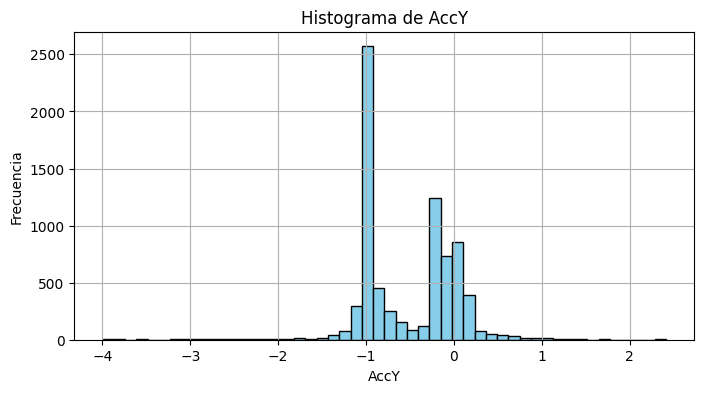

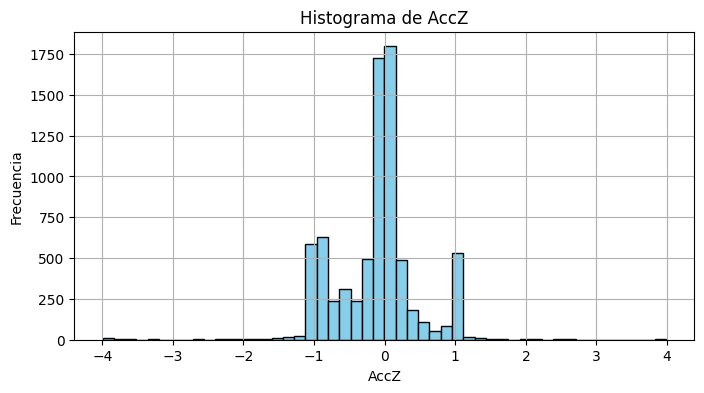

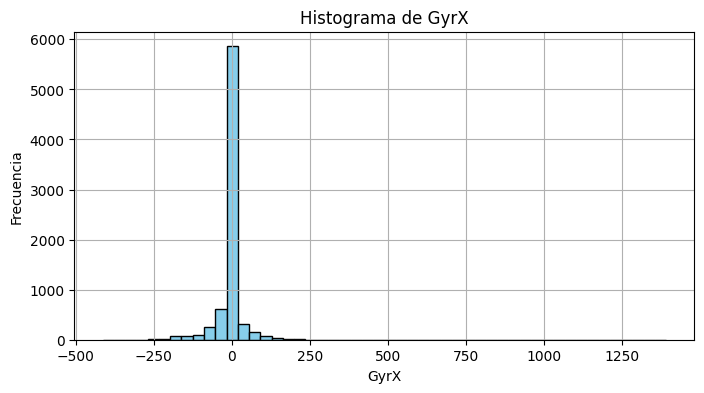

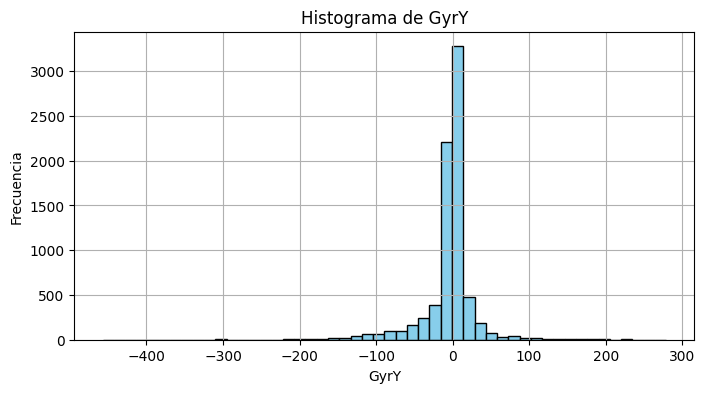

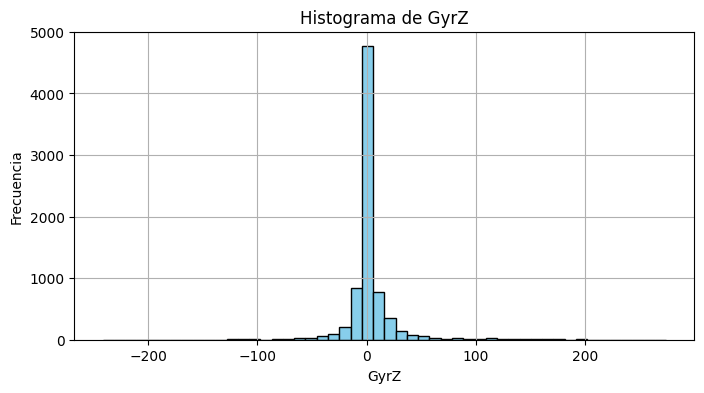

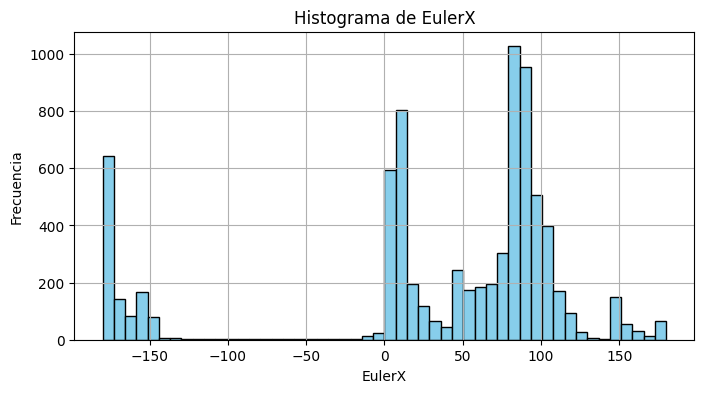

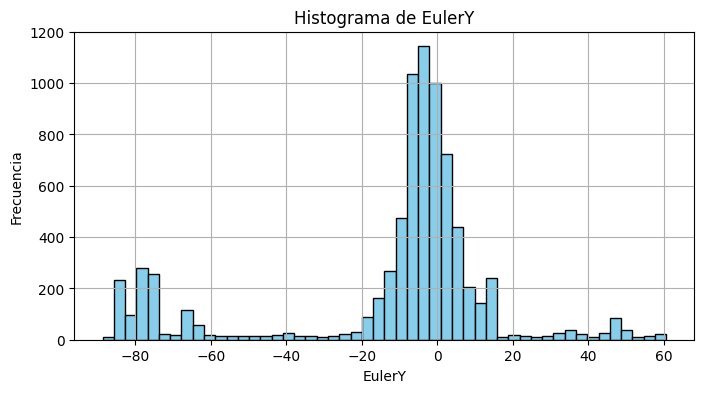

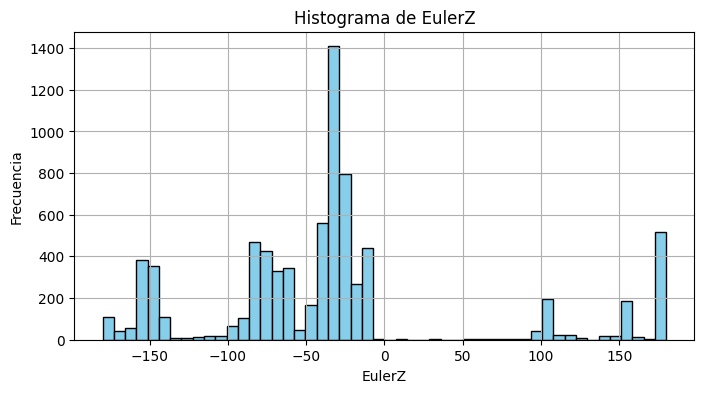

In [ ]:
import matplotlib.pyplot as plt
for col in df_all.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,4))
    plt.hist(df_all[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# 5.Normalizar los datos y reestructurar

In [ ]:
x_train_flat = []

for idx, row in x_train.iterrows():
    acc = row['Acc'].flatten()
    gyro = row['Gyro'].flatten()
    euler = row['Euler'].flatten()
    x_train_flat.append(np.concatenate([acc, gyro, euler]))

x_train_flat = np.array(x_train_flat)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)

In [ ]:
x_train_scaled
x_train_restructured = pd.DataFrame(columns=['Acc', 'Gyro', 'Euler'])
reshaped_data = []
for i in range(x_train_scaled.shape[0]):
    acc_scaled = x_train_scaled[i, :150].reshape(50, 3)
    gyro_scaled = x_train_scaled[i, 150:300].reshape(50, 3)
    euler_scaled = x_train_scaled[i, 300:].reshape(50, 3)

    reshaped_data.append((acc_scaled, gyro_scaled, euler_scaled))

x_train_restructured['Acc'] = [data[0] for data in reshaped_data]
x_train_restructured['Gyro'] = [data[1] for data in reshaped_data]
x_train_restructured['Euler'] = [data[2] for data in reshaped_data]

In [ ]:
x_train_restructured

,Acc,Gyro,Euler
0,"[[-0.2673461933947936, -0.4114356547537979, -0...","[[-0.44989776851843816, -0.06477147816857497, ...","[[-0.6915448080483917, -0.6536607288935863, 1...."
1,"[[-0.2381443669387575, -0.38948968995774724, -...","[[-0.18628145617119468, -0.09583060291543229, ...","[[-0.6903779735841711, -0.630985290218129, 1.0..."
2,"[[-0.20894254048272148, -0.3510842515646588, -...","[[0.1347708124975152, -0.08507936742613552, -0...","[[-0.6658744498355389, -0.6122110022825353, 1...."
3,"[[-0.1956689830027051, -0.09504799561073461, -...","[[0.7150212430272018, -0.18781339543497128, -0...","[[-0.6373258999442755, -0.5936805362681831, 1...."
4,"[[-0.3151310003228525, -0.4096068243541268, -0...","[[1.097927618503645, 0.3067434370726798, -0.18...","[[-0.5829514139115964, -0.5471105493110611, 1...."
...,...,...,...
251139,"[[0.06449274360561591, -0.6382106243129879, -0...","[[0.1170982105524486, -0.3072715675382686, -0....","[[0.27685000829040746, -0.018504624059539697, ..."
251140,"[[-0.023112735762492193, -0.5979763555202283, ...","[[0.01253531571080456, -0.4004489417788406, -0...","[[0.27887252136172297, -0.015578761004641969, ..."
251141,"[[-0.031076870250502018, -0.5906610339215448, ...","[[0.047880519600937754, -0.33833069228512597, ...","[[0.2801171447902254, -0.015578761004641969, 0..."
251142,"[[-0.0549692737145315, -0.618093489916608, 0.0...","[[0.044935085943426656, -0.20214837608736694, ...","[[0.2840843819685751, -0.0121652541072613, 0.0..."


Normalizar validación

In [ ]:
x_val_flat = []
for idx, row in x_val.iterrows():
    acc = row['Acc'].flatten()
    gyro = row['Gyro'].flatten()
    euler = row['Euler'].flatten()
    x_val_flat.append(np.concatenate([acc, gyro, euler]))

x_val_flat = np.array(x_val_flat)

x_val_scaled = scaler.transform(x_val_flat)

In [ ]:
x_val_scaled
x_val_restructured = pd.DataFrame(columns=['Acc', 'Gyro', 'Euler'])
reshaped_data_val = []
for i in range(x_val_scaled.shape[0]):
    acc_scaled = x_val_scaled[i, :150].reshape(50, 3)
    gyro_scaled = x_val_scaled[i, 150:300].reshape(50, 3)
    euler_scaled = x_val_scaled[i, 300:].reshape(50, 3)

    reshaped_data_val.append((acc_scaled, gyro_scaled, euler_scaled))

x_val_restructured['Acc'] = [data[0] for data in reshaped_data_val]
x_val_restructured['Gyro'] = [data[1] for data in reshaped_data_val]
x_val_restructured['Euler'] = [data[2] for data in reshaped_data_val]

Normalizar test

In [ ]:
x_test_flat = []
for idx, row in x_test.iterrows():
    acc = row['Acc'].flatten()
    gyro = row['Gyro'].flatten()
    euler = row['Euler'].flatten()
    x_test_flat.append(np.concatenate([acc, gyro, euler]))

x_test_flat = np.array(x_test_flat)

x_test_scaled = scaler.transform(x_test_flat)

In [ ]:
x_test_scaled
x_test_restructured = pd.DataFrame(columns=['Acc', 'Gyro', 'Euler'])
reshaped_data_test = []
for i in range(x_test_scaled.shape[0]):
    acc_scaled = x_test_scaled[i, :150].reshape(50, 3)
    gyro_scaled = x_test_scaled[i, 150:300].reshape(50, 3)
    euler_scaled = x_test_scaled[i, 300:].reshape(50, 3)

    reshaped_data_test.append((acc_scaled, gyro_scaled, euler_scaled))
x_test_restructured['Acc'] = [data[0] for data in reshaped_data_test]
x_test_restructured['Gyro'] = [data[1] for data in reshaped_data_test]
x_test_restructured['Euler'] = [data[2] for data in reshaped_data_test]

Descarcar los conjuntos de datos.

In [ ]:
from google.colab import files
x_train_restructured.to_pickle('x_train_restructured.pkl')
files.download('x_train_restructured.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_val_restructured.to_pickle('x_val_restructured.pkl')
files.download('x_val_restructured.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_test_restructured.to_pickle('x_test_restructured.pkl')
files.download('x_test_restructured.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_train.to_csv('y_train.csv', index=False)
files.download('y_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_val.to_csv('y_val.csv', index=False)
files.download('y_val.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_test.to_csv('y_test.csv', index=False)
files.download('y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
id_train.to_csv('id_train.csv', index=False)
files.download('id_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
id_val.to_csv('id_val.csv', index=False)
files.download('id_val.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
id_test.to_csv('id_test.csv', index=False)
files.download('id_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Conjunto para algoritmos clásicos de ML.

In [ ]:
def extract_features_from_series(series):
    series = np.asarray(series).astype(float)

    return {
        'mean': np.mean(series),
        'std': np.std(series),
        'var': np.var(series),
        'max': np.max(series),
        'min': np.min(series),
        'range': np.ptp(series),
        'kurtosis': pd.Series(series).kurtosis(),
        'skewness': pd.Series(series).skew()
    }
def process_sensor(sensor_data, prefix):
    x_vals = np.array([point[0] for point in sensor_data])
    y_vals = np.array([point[1] for point in sensor_data])
    z_vals = np.array([point[2] for point in sensor_data])

    x_features = extract_features_from_series(x_vals)
    y_features = extract_features_from_series(y_vals)
    z_features = extract_features_from_series(z_vals)

    features = {f'{prefix}_x_{k}': v for k, v in x_features.items()}
    features.update({f'{prefix}_y_{k}': v for k, v in y_features.items()})
    features.update({f'{prefix}_z_{k}': v for k, v in z_features.items()})

    return features

all_features = []
for _, row in x_train_restructured.iterrows():
    features = {}
    features.update(process_sensor(row['Acc'], 'acc'))
    features.update(process_sensor(row['Gyro'], 'gyro'))
    features.update(process_sensor(row['Euler'], 'euler'))
    all_features.append(features)

all_features_val = []
for _, row in x_val_restructured.iterrows():
    features = {}
    features.update(process_sensor(row['Acc'], 'acc'))
    features.update(process_sensor(row['Gyro'], 'gyro'))
    features.update(process_sensor(row['Euler'], 'euler'))
    all_features_val.append(features)

all_features_test = []
for _, row in x_test_restructured.iterrows():
    features = {}
    features.update(process_sensor(row['Acc'], 'acc'))
    features.update(process_sensor(row['Gyro'], 'gyro'))
    features.update(process_sensor(row['Euler'], 'euler'))
    all_features_test.append(features)

x_train_ml = pd.DataFrame(all_features)
x_val_ml = pd.DataFrame(all_features_val)
x_test_ml = pd.DataFrame(all_features_test)

In [ ]:
x_train_ml.to_csv('x_train_ml.csv', index=False)
x_val_ml.to_csv('x_val_ml.csv', index=False)
x_test_ml.to_csv('x_test_ml.csv', index=False)

In [ ]:
files.download('x_train_ml.csv')
files.download('x_val_ml.csv')
files.download('x_test_ml.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>